In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (14,7)
sns.set()

In [2]:
data = pd.read_csv('train.csv')

In [3]:
cols = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']

In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

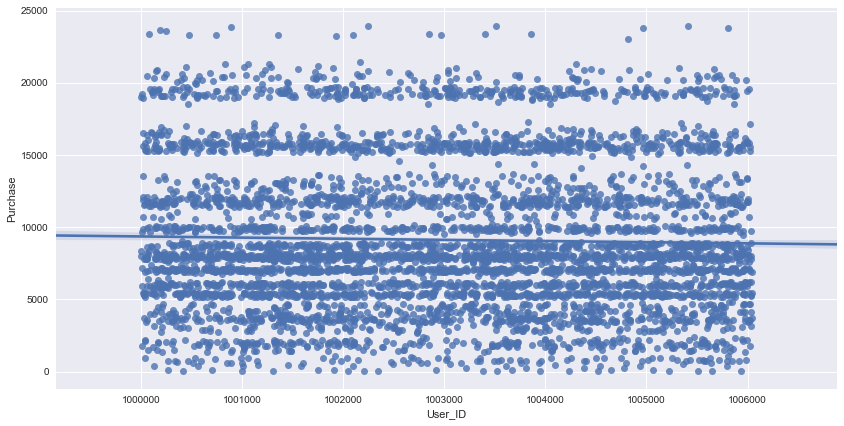

In [5]:
sns.regplot(data.loc[::100, 'User_ID'], data.loc[::100, 'Purchase'])
plt.show()

## User_ID --

In [6]:
cols.remove('User_ID')

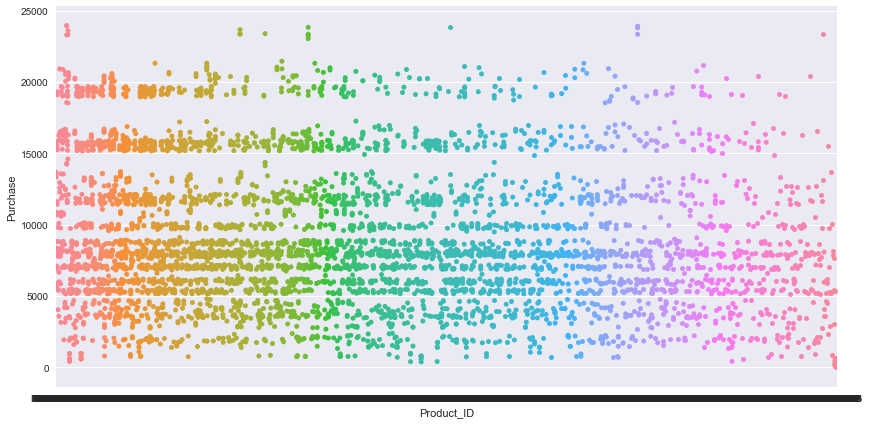

In [7]:
sns.stripplot(data.loc[::100, 'Product_ID'], data.loc[::100, 'Purchase'])
plt.show()

## Product ID++

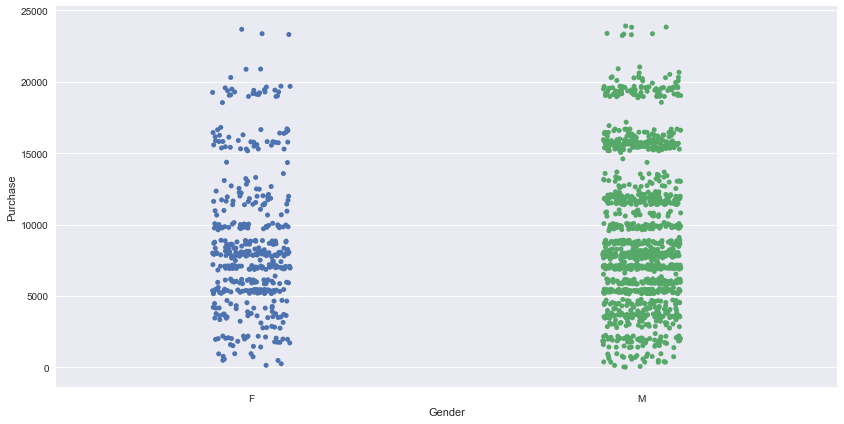

In [8]:
# sns.stripplot(data.Gender.values, data.Purchase.values, jitter=True)
sns.stripplot(data.loc[::300, 'Gender'], data.loc[::300, 'Purchase'], jitter=True)
plt.show()

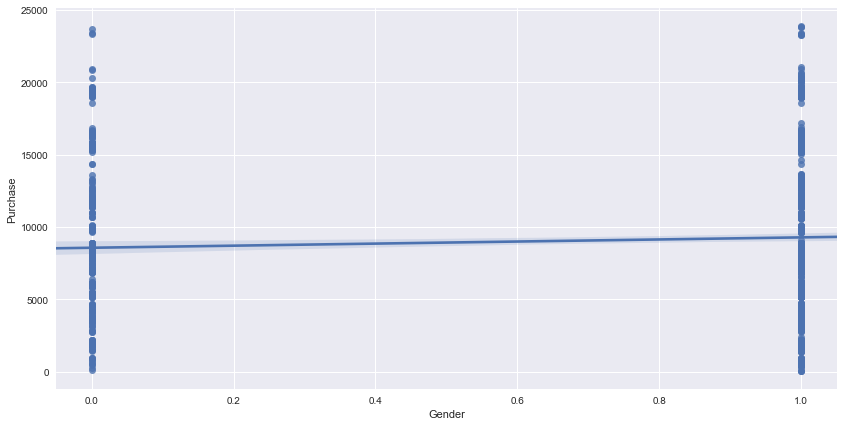

In [9]:
data.Gender = data.Gender.replace({'F':0, 'M': 1})
sns.regplot(data.loc[::300, 'Gender'], data.loc[::300, 'Purchase'])
plt.show()

## Gender ++

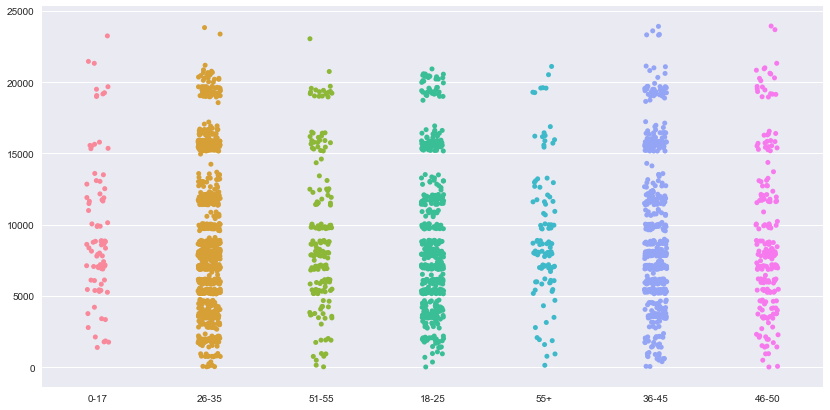

In [10]:
sns.stripplot(data.loc[::200, 'Age'].values, data.loc[::200, 'Purchase'].values, jitter=True)
plt.show()

## Age++

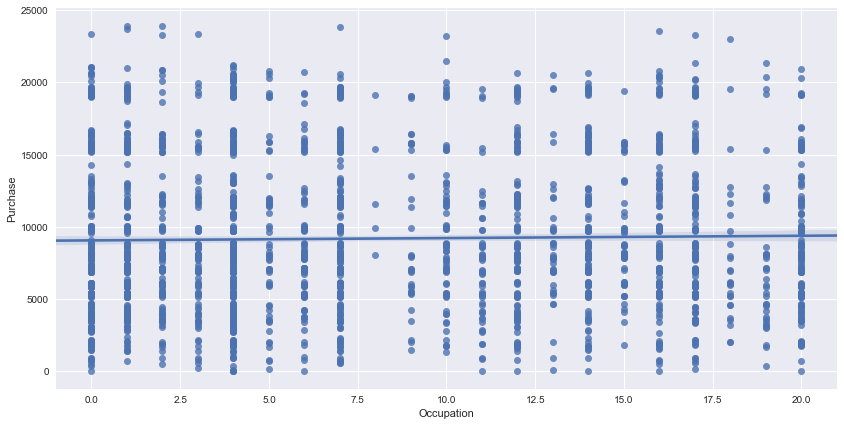

In [11]:
sns.regplot(data.loc[::200, 'Occupation'], data.loc[::200, 'Purchase'])
plt.show()

In [12]:
data = data.drop('User_ID', axis=1)

In [13]:
# print(list(data.Age.unique()))
lb = preprocessing.LabelEncoder()
lb.fit(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
data.Age = lb.transform(data.Age)

In [14]:
# print(list(data.City_Category.unique()))
lb = preprocessing.LabelEncoder()
lb.fit(['A', 'B', 'C'])
data.City_Category = lb.transform(data.City_Category)

In [15]:
# print(data.Stay_In_Current_City_Years.unique())
lb = preprocessing.LabelEncoder().fit(['0', '1', '2', '3', '4+'])
data.Stay_In_Current_City_Years = lb.transform(data.Stay_In_Current_City_Years)

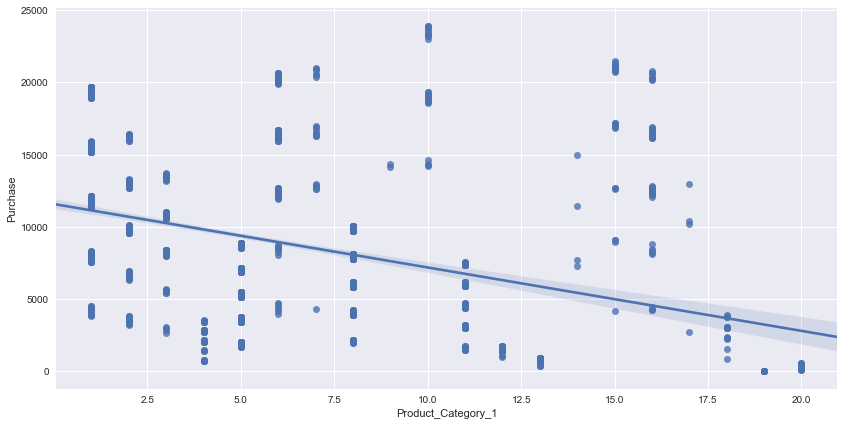

In [16]:
sns.regplot(data.loc[::200, 'Product_Category_1'], data.loc[::200, 'Purchase'])
plt.show()

## Product_Category_1 ++++++

In [17]:
# len(data.Product_ID.unique()) # ==> 3631
# pid = data.Product_ID.unique()
# [x for x in pid if x[-2:] == '42']
# ['P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
# data[data.Product_ID == 'P00085442'].Product_Category_2.isnull().unique()
# this 5 Pids P_cat_2 & 3 are null

# data.Product_ID
# data.loc[[i for i,x in enumerate(data.Product_ID) if (x[:4]=='P000' and len(x)==8)]]
# {'P000', 'P001', 'P002', 'P003', 'P009'}
# data.loc[[1206,8]]

In [18]:
data['pid_4_f_lett_0'] = np.zeros(len(data))
data['pid_4_f_lett_1'] = np.zeros(len(data))
data['pid_4_f_lett_2'] = np.zeros(len(data))
data['pid_4_f_lett_3'] = np.zeros(len(data))
data['pid_4_f_lett_4'] = np.zeros(len(data))
data['pid_2_l_lett'] = np.zeros(len(data))
data['pid'] = np.zeros(len(data))

In [19]:
pid = data.Product_ID
tmp_0 = []
tmp_1 = []
tmp_2 = []
tmp_3 = []
tmp_4 = []
for i, x in enumerate(pid):
    if x[:4] == 'P000':
        tmp_0.append(i)
    elif x[:4] == 'P001':
        tmp_1.append(i)
    elif x[:4] == 'P002':
        tmp_2.append(i)
    elif x[:4] == 'P003':
        tmp_3.append(i)
    elif x[:4] == 'P009':
        tmp_4.append(i)
    else:
        print("UnExpected VALUE !!!!!!!!!!!!!!")

data['pid_4_f_lett_0'].loc[tmp_0] = 1.0
data['pid_4_f_lett_1'].loc[tmp_1] = 1.0
data['pid_4_f_lett_2'].loc[tmp_2] = 1.0
data['pid_4_f_lett_3'].loc[tmp_3] = 1.0
data['pid_4_f_lett_4'].loc[tmp_4] = 1.0

data.pid_2_l_lett = [x[-2:] for x in data.Product_ID]
data.pid = [x[4:-2] for x in data.Product_ID]

/usr/lib/python3/dist-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
data = data.drop('Product_ID', axis=1)

In [21]:
imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=1)
imputer.fit_transform(data.drop('Purchase', axis=1))
data.Product_Category_2 = imputer.transform(data.Product_Category_2)[0]
data.Product_Category_3 = imputer.transform(data.Product_Category_3)[0]

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('Purchase', axis=1),
    data.Purchase,
    test_size=0.2)
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=17)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [34]:
model.scorere(x_test, y_test) * 100

70.963640551756413

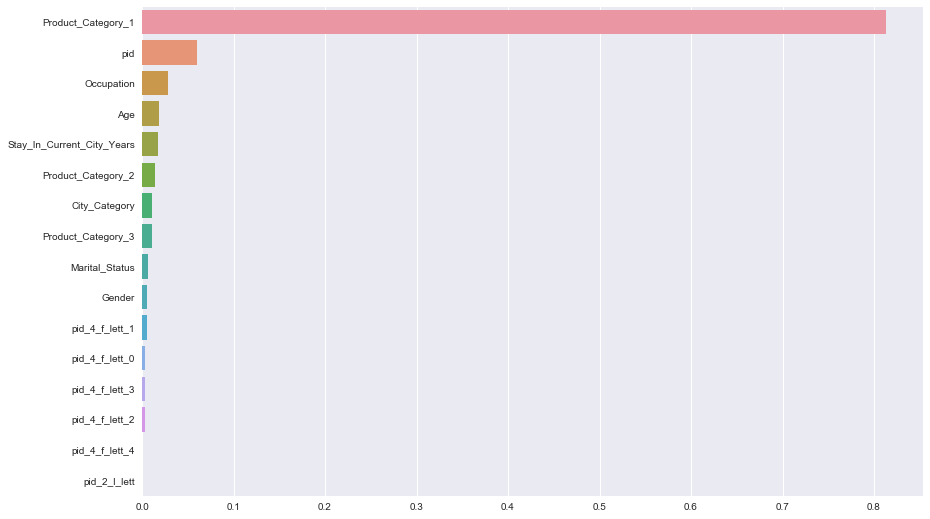

In [49]:
ft_imp = []
cols = data.drop('Purchase', axis=1).columns
for i in range(len(cols)):
    ft_imp.append((cols[i], list(model.feature_importances_)[i]))
ft_imp = sorted(ft_imp, key=lambda x: x[1], reverse=True)
sns.barplot([y for x,y in ft_imp], [x for x,y in ft_imp] , orient='h')
plt.show()